# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
import pandas as pd
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [11]:
#Your code here
print(data.keys())
print(type(data['meta']))
print(data['meta'].keys())
print(type(data['data']))
print(data['meta']['view'].keys())
#print(data['meta']['view'][0])
print(data['data'][0])
print(len(data['meta']['view']))
print(len(data['data'][0]))

dict_keys(['meta', 'data'])
<class 'dict'>
dict_keys(['view'])
<class 'list'>
dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])
[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, 

In [17]:
data['meta']['view']

{'id': 'g4ie-h725',
 'name': 'U.S. Chronic Disease Indicators (CDI)',
 'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health',
 'attributionLink': 'http://www.cdc.gov/nccdphp/dph/',
 'averageRating': 0,
 'category': 'Chronic Disease Indicators',
 'createdAt': 1463517008,
 'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.",
 'displayType': 'table',
 'downloadCount': 80068,
 'hideFromCatalog': False,
 'hideFromDataJson': 

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [47]:
#Your code here
df = pd.DataFrame(data['data'])
df.columns = [i['name'] for i in data['meta']['view']['columns']]
df.head()
print(df.columns)
#for x in df['Response'].value_counts().index: print(x)
df['DataValue'].head()

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


0    16.9
1      13
2    18.2
3    15.6
4      15
Name: DataValue, dtype: object

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [19]:
import seaborn as sns

# Notes:
Column 'Topic' can be 'Asthma' <br>
'LocationAbbr' contains state abbreviation<br>
'Question' can be 'Current asthma prevalence among adults aged >= 18 years'

In [76]:
Asthma_rates = df[df['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
Asthma_rates['DataValue'] = pd.to_numeric(Asthma_rates['DataValue'])
Asthma_rates['DataValue'].fillna(Asthma_rates['DataValue'].median(),inplace = True)
#Asthma_rates.describe()
grouped = Asthma_rates.groupby('LocationAbbr').mean()
grouped.head()
#sns.barplot(Asthma_rates['LocationAbbr'].value_counts())
#Asthma_rates['DataValue'].head()

D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sid,position,created_at,updated_at,DataValue
LocationAbbr,,,,,
AK,9768.5625,9768.5625,1.527195e+09,1.527195e+09,9.33750
AL,9767.5000,9767.5000,1.527195e+09,1.527195e+09,10.76875
AR,9770.5625,9770.5625,1.527195e+09,1.527195e+09,8.94375
AZ,9769.5625,9769.5625,1.527195e+09,1.527195e+09,9.55625
CA,9771.5625,9771.5625,1.527195e+09,1.527195e+09,8.13125


In [82]:
import matplotlib.pyplot as plt

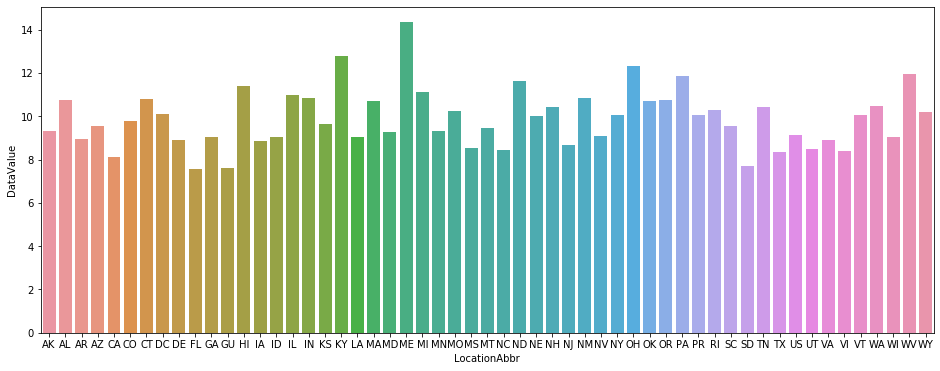

In [84]:
fig = plt.figure(figsize = (16,6))
ax = sns.barplot(grouped.index,grouped['DataValue'])
#ax.set(rc={'figure.figsize':(16,9)})

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!